# **Part1: using wget to download the data**

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data


--2022-10-19 18:06:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/x-httpd-php]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K  1.49MB/s    in 0.3s    

2022-10-19 18:06:58 (1.49 MB/s) - ‘arrhythmia.data’ saved [402355/402355]



In [1]:
# list the files in the current directory
!ls

sample_data


In [4]:
# check if the data has a header
!head arrhythmia.data

75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,

In [5]:
# check the data
import pandas as pd
df = pd.read_csv('arrhythmia.data', header = None)

In [7]:
# take the first few columns of the data and name them as documentation
data = df[[0, 1, 2, 3, 4, 5]]
data.columns = ['age', 'sex', 'hight', 'weight', 'QRS duration', 'P-R interval'] 

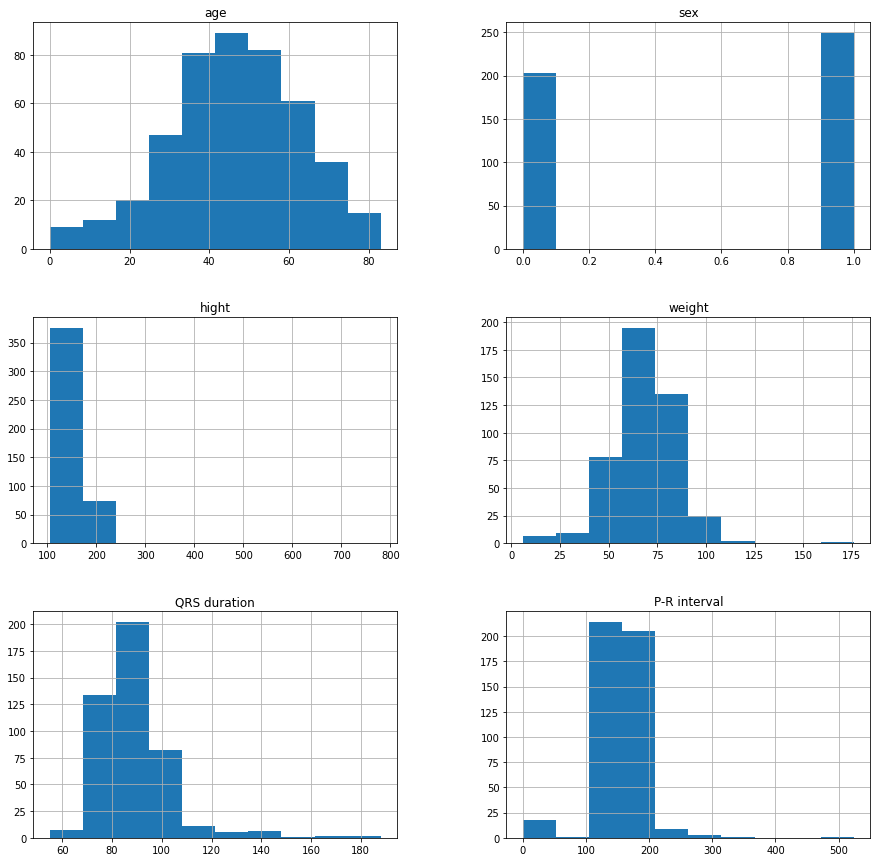

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15] #making the figure bigger so subplots don't overlap
data.hist();

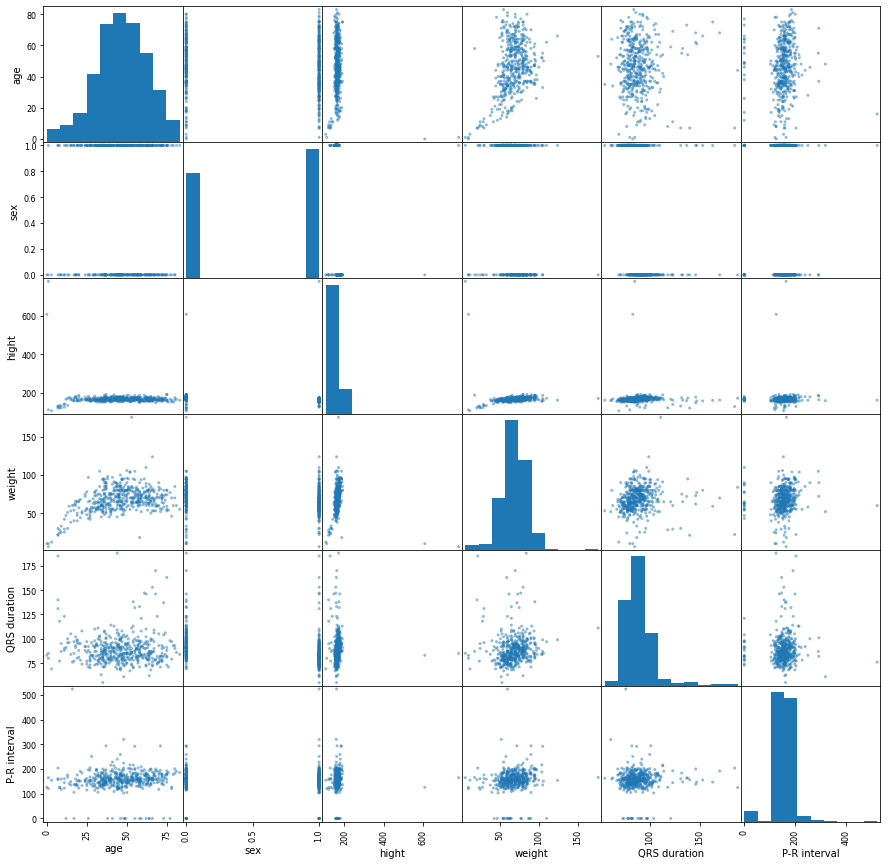

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(data);

# **Part2: tf.keras**

In [11]:
# use keras get_file() to download the data set
# source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'


In [14]:
# install tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


In [15]:
tf.keras.utils.get_file('auto-mpg.data', url)

30286/30286 [==============================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [16]:
!head /root/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [17]:
# if we don't specify the path the data will go /root/.keras/datasets/
df = pd.read_csv('/root/.keras/datasets/auto-mpg.data', header = None, delim_whitespace = True)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Part3: load the date yourself

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Untitled.txt to Untitled.txt


In [22]:
!ls

'5 cautery.xlsx'   arrhythmia.data   sample_data   Untitled.txt


In [23]:
df = pd.read_csv('Untitled.txt', error_bad_lines = False)

In [24]:
df.head()

,1,2
0,2,3
1,3,4
2,4,5


In [25]:
!pwd

/content


# Part4: access files from google drive

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
!ls

'5 cautery.xlsx'   arrhythmia.data   gdrive   sample_data   Untitled.txt


In [28]:
!ls gdrive

MyDrive  Othercomputers


In [29]:
!ls '/content/gdrive/MyDrive'

 1ded3fd1-fbfe-446a-9daa-e4cda1318f56.JPG   myBackup
'Colab Notebooks'			   'rueStRoch_photos (1).zip'
 housing				   'rueStRoch_photos (2).zip'
'Isvicre vize'				    rueStRoch_photos.zip
 Manuscript_robofish_090222.docx	   'TF2.0 Intro.ipynb'
'Manuscript_robofish_090222 figs.docx'
